In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as t
#from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
#Read data from the dataset
df=pd.read_csv('Customers_File.csv', delimiter=',')
df.head(10)

,Customer_ID,First_Name,Last_Name,DOB,Customer_Type,PAN,Date_of_joining,Date_of_exit,Deceased_Flag,Gender,Martial_Status,PEP_Flag,CTF_Flag,Country_of_residence,Country_of_Origin,Fraud
0,8606,RADDULAN,SAHIRON,21-05-1989,1,616802609,27-10-2008,03-06-2015,True,M,Married,False,False,Philippines,Philippines,Fraud
1,6462,AHMED,ABDULLAH,04-02-1963,1,868739475,18-04-2009,09-12-2019,True,M,Married,False,True,Egypt,Egypt,Fraud
2,9574,HASAN,IZZALDIN,24-04-1963,2,544436596,18-07-2003,23-07-2020,True,M,Married,False,False,Turkey,Kenya,Fraud
3,5350,AHLAM,AlTAMIMI,14-04-1980,3,212184907,17-11-2013,28-08-2011,False,F,Not Married,True,True,Turkey,Jordan,Fraud
4,8903,RAMADAN,SHALLAH,01-01-1958,2,849660885,10-04-2020,04-02-2014,False,M,Married,True,True,Gaza Strip,Gaza Strip,Fraud
5,9405,ABDELKARIM,MOHAMED,21-08-1986,2,843535347,26-08-2001,10-06-2020,True,M,Not Married,False,False,Syria,SauDiArabia,Fraud
6,6231,JOANNE,CHESIMARD,02-10-1952,2,422261413,30-01-2020,15-06-2013,False,M,Married,False,False,Indonesia,China,Fraud
7,5738,ALI,ATWA,17-10-1988,1,642127930,12-05-2015,12-05-2007,False,M,Married,False,True,China,Indonesia,Fraud
8,8954,SAIF,ADEL,02-02-1963,1,490435667,16-07-2015,13-01-2009,True,M,Married,True,False,Egypt,Honduras,Fraud
9,7037,AYMAN,ZAWAHIRI,03-09-1951,1,404226711,17-01-2008,31-08-2007,True,M,Not Married,False,True,Iraq,Pakistan,Fraud


In [3]:
#Data Pre-processing
#Removal of extra spaces from the data
df['First_Name']=df['First_Name'].str.strip()
df['Last_Name']=df['Last_Name'].str.strip()
#Converting columns into Lists for the tokernizer
first_name=list(df.First_Name.values)
last_name=list(df.Last_Name.values)
fraud=list(df.Fraud.values)

#DOB to be split into DD MM and YYYY for ML algo
df[['DD','MM','YYYY']]=df.DOB.str.split("-", expand=True,)
#Now DOB column can be dropped from the dataframe
df=df.drop(columns=['DOB','Date_of_joining','Date_of_exit'])
df['DD']=df['DD'].astype(int)
df['MM']=df['MM'].astype(int)
df['YYYY']=df['YYYY'].astype(int)

deceased_flag={
    True : 1,
    False : 0
}

df=df.replace({'Deceased_Flag':deceased_flag})
#df['Deceased_Flag'].head(10)

gender ={
    'M' : 0,
    'F' : 1
}

df=df.replace({'Gender': gender})

martial_status={
    'Married' : 1,
    'Not Married' : 0
}

df = df.replace({'Martial_Status': martial_status})

pep_flag={
    False : 0,
    True : 1
}

df = df.replace({'PEP_Flag': pep_flag})

ctf_flag={
    False : 0,
    True : 1
}

df = df.replace({'CTF_Flag': ctf_flag})



In [4]:
df_country=pd.read_csv('Country.csv', delimiter=',')
#df_country.head(10)
#df_country=df_country.drop(columns='ID')
df_country.head(10)
#df_country_dict = df_country.to_dict()
#df_country_dict_n = dict([(value, key) for key, value in df_country_dict.items()])
#df_country_dict
df_country_dict = df_country.set_index('Name').to_dict()
df_country_dict = df_country_dict['ID']
df_country_dict

{'Philippines': 1,
 'Egypt': 2,
 'Turkey': 3,
 'Gaza Strip': 4,
 'Syria': 5,
 'Indonesia': 6,
 'China': 7,
 'Iraq': 8,
 'Comoros': 9,
 'North Korea': 10,
 'Pakistan': 11,
 'United States': 12,
 'Yemen': 13,
 'Russia': 14,
 'Portugal': 15,
 'Denmark': 16,
 'Iran': 17,
 'Thailand': 18,
 'UAE': 19,
 'India': 20,
 'Bosnia and Herzegovina': 21,
 'Serbia': 22,
 'Finland': 23,
 'Ukraine': 24,
 'Peru': 25,
 'Kazakhstan': 26,
 'Brazil': 27,
 'Bangladesh': 28,
 'Netherlands': 29,
 'Mozambique': 30,
 'Poland': 31,
 'Argentina': 32,
 'Estonia': 33,
 'France': 34,
 'Belarus': 35,
 'Norway': 36,
 'Namibia': 37,
 'Greece': 38,
 'South Korea': 39,
 'Japan': 40,
 'Colombia': 41,
 'Cameroon': 42,
 'Albania': 43,
 'Hungary': 44,
 'Sweden': 45,
 'Ethiopia': 46,
 'Czech Republic': 47,
 'Central African Republic': 48,
 'Senegal': 49,
 'Chad': 50,
 'Paraguay': 51,
 'American Samoa': 52,
 'Canada': 53,
 'Spain': 54,
 'Morocco': 55,
 'Panama': 56,
 'Bahrain': 57,
 'Mauritius': 58,
 'Guinea': 59,
 'Nigeria': 60

In [5]:
df = df.replace({'Country_of_residence' : df_country_dict})
df = df.replace({'Country_of_Origin' : df_country_dict})
df.head(10)

,Customer_ID,First_Name,Last_Name,Customer_Type,PAN,Deceased_Flag,Gender,Martial_Status,PEP_Flag,CTF_Flag,Country_of_residence,Country_of_Origin,Fraud,DD,MM,YYYY
0,8606,RADDULAN,SAHIRON,1,616802609,1,0,1,0,0,1,1,Fraud,21,5,1989
1,6462,AHMED,ABDULLAH,1,868739475,1,0,1,0,1,2,2,Fraud,4,2,1963
2,9574,HASAN,IZZALDIN,2,544436596,1,0,1,0,0,3,78,Fraud,24,4,1963
3,5350,AHLAM,AlTAMIMI,3,212184907,0,1,0,1,1,3,116,Fraud,14,4,1980
4,8903,RAMADAN,SHALLAH,2,849660885,0,0,1,1,1,4,4,Fraud,1,1,1958
5,9405,ABDELKARIM,MOHAMED,2,843535347,1,0,0,0,0,5,143,Fraud,21,8,1986
6,6231,JOANNE,CHESIMARD,2,422261413,0,0,1,0,0,6,7,Fraud,2,10,1952
7,5738,ALI,ATWA,1,642127930,0,0,1,0,1,7,6,Fraud,17,10,1988
8,8954,SAIF,ADEL,1,490435667,1,0,1,1,0,2,77,Fraud,2,2,1963
9,7037,AYMAN,ZAWAHIRI,1,404226711,1,0,0,0,1,8,11,Fraud,3,9,1951


In [6]:
fraud={
    'Fraud' : 1,
    'Not Fraud' : 0
}

df = df.replace({'Fraud': fraud})
df.head(10)

,Customer_ID,First_Name,Last_Name,Customer_Type,PAN,Deceased_Flag,Gender,Martial_Status,PEP_Flag,CTF_Flag,Country_of_residence,Country_of_Origin,Fraud,DD,MM,YYYY
0,8606,RADDULAN,SAHIRON,1,616802609,1,0,1,0,0,1,1,1,21,5,1989
1,6462,AHMED,ABDULLAH,1,868739475,1,0,1,0,1,2,2,1,4,2,1963
2,9574,HASAN,IZZALDIN,2,544436596,1,0,1,0,0,3,78,1,24,4,1963
3,5350,AHLAM,AlTAMIMI,3,212184907,0,1,0,1,1,3,116,1,14,4,1980
4,8903,RAMADAN,SHALLAH,2,849660885,0,0,1,1,1,4,4,1,1,1,1958
5,9405,ABDELKARIM,MOHAMED,2,843535347,1,0,0,0,0,5,143,1,21,8,1986
6,6231,JOANNE,CHESIMARD,2,422261413,0,0,1,0,0,6,7,1,2,10,1952
7,5738,ALI,ATWA,1,642127930,0,0,1,0,1,7,6,1,17,10,1988
8,8954,SAIF,ADEL,1,490435667,1,0,1,1,0,2,77,1,2,2,1963
9,7037,AYMAN,ZAWAHIRI,1,404226711,1,0,0,0,1,8,11,1,3,9,1951


In [7]:
#Tokenizing First Name
tk_fn = Tokenizer(num_words=2, lower=False, oov_token='<OOV>')
tk_fn.fit_on_texts(first_name)
wi_fn=tk_fn.word_index
wi_fn

#Tokenizing Last Name
tk_ln = Tokenizer(num_words=2, lower=False, oov_token='<OOV>')
tk_ln.fit_on_texts(last_name)
wi_ln=tk_ln.word_index
wi_ln

#Reflecting changes to the Dataframe
df=df.replace({"First_Name" : wi_fn})
df=df.replace({"Last_Name" : wi_ln})

df = df.drop(columns='Customer_ID')

In [8]:
df.head(10)

,First_Name,Last_Name,Customer_Type,PAN,Deceased_Flag,Gender,Martial_Status,PEP_Flag,CTF_Flag,Country_of_residence,Country_of_Origin,Fraud,DD,MM,YYYY
0,1230,1134,1,616802609,1,0,1,0,0,1,1,1,21,5,1989
1,1231,1135,1,868739475,1,0,1,0,1,2,2,1,4,2,1963
2,1232,1136,2,544436596,1,0,1,0,0,3,78,1,24,4,1963
3,1233,1137,3,212184907,0,1,0,1,1,3,116,1,14,4,1980
4,1234,1138,2,849660885,0,0,1,1,1,4,4,1,1,1,1958
5,1235,1139,2,843535347,1,0,0,0,0,5,143,1,21,8,1986
6,434,1140,2,422261413,0,0,1,0,0,6,7,1,2,10,1952
7,1236,1141,1,642127930,0,0,1,0,1,7,6,1,17,10,1988
8,1237,90,1,490435667,1,0,1,1,0,2,77,1,2,2,1963
9,1238,1142,1,404226711,1,0,0,0,1,8,11,1,3,9,1951


In [9]:
#Shuffling of the data in the dataframe to avoid overfitting or underfitting
df = df.sample(frac = 1)
df

,First_Name,Last_Name,Customer_Type,PAN,Deceased_Flag,Gender,Martial_Status,PEP_Flag,CTF_Flag,Country_of_residence,Country_of_Origin,Fraud,DD,MM,YYYY
5507,1093,5460,5,892346086,0,1,0,0,0,18,1,0,4,3,2005
7209,1199,6822,4,540542334,0,0,0,0,0,47,36,0,19,3,2005
2680,2047,524,4,208505866,0,1,0,0,0,24,1,0,15,6,1977
2839,1298,3374,4,210753665,0,0,1,0,0,55,7,0,10,11,1980
3658,368,377,3,726749142,0,0,1,0,0,7,102,0,8,2,1984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8911,1852,8169,3,838950464,0,1,0,0,0,77,12,0,14,5,2015
2953,903,3469,2,464917949,0,0,1,0,0,41,81,0,20,12,1993
169,1284,1254,5,167459160,0,0,1,0,0,12,13,0,16,10,1998
9833,1854,8879,3,556500211,0,0,0,0,0,27,7,0,17,5,2005


In [10]:
#Machine Learning Starts
#Imports
import itertools
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#%matplotlib inline

In [11]:
#Dividing data into Input Vector and Dependent Variable
X=df[['First_Name','Last_Name','DD','MM','YYYY','Customer_Type','PAN','Deceased_Flag','Gender','Martial_Status','PEP_Flag','CTF_Flag','Country_of_residence','Country_of_Origin']].values
y=df['Fraud'].values

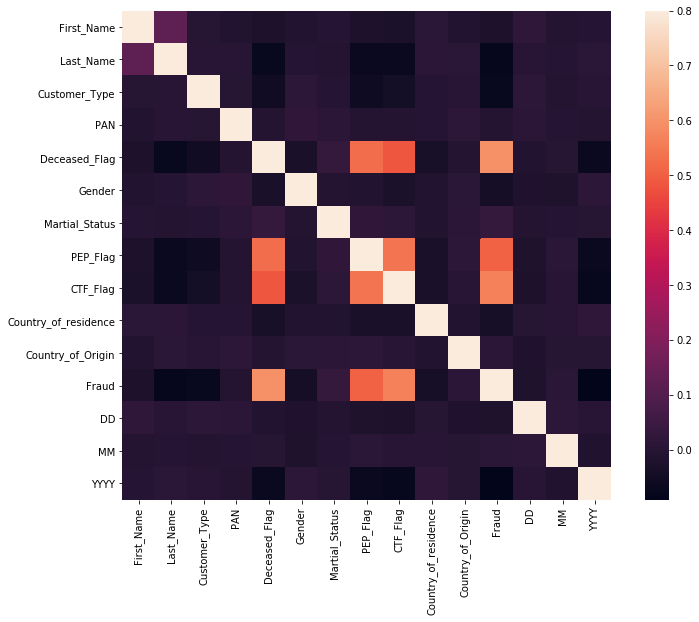

In [12]:
#Corelation Matrix
corrmat=df.corr()
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show()

In [13]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (8800, 14) (8800,)
Test set: (2200, 14) (2200,)


In [14]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
FDTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
FDTree # it shows the default parameters
FDTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
#Prediction
predTree = FDTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 0 0]
[0 0 0 0 0]


In [16]:
#Evaluation
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
print("The model used is Decision Tree classifier") 
  
acc = accuracy_score(y_test, predTree) 
print("The accuracy is {}".format(acc)) 
  
#prec = precision_score(y_test, predTree) 
#print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, predTree) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, predTree) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, predTree) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The model used is Decision Tree classifier
The accuracy is 0.9986363636363637
The recall is 0.8333333333333334
The F1-Score is 0.8695652173913043
The Matthews correlation coefficient is0.86971219551964


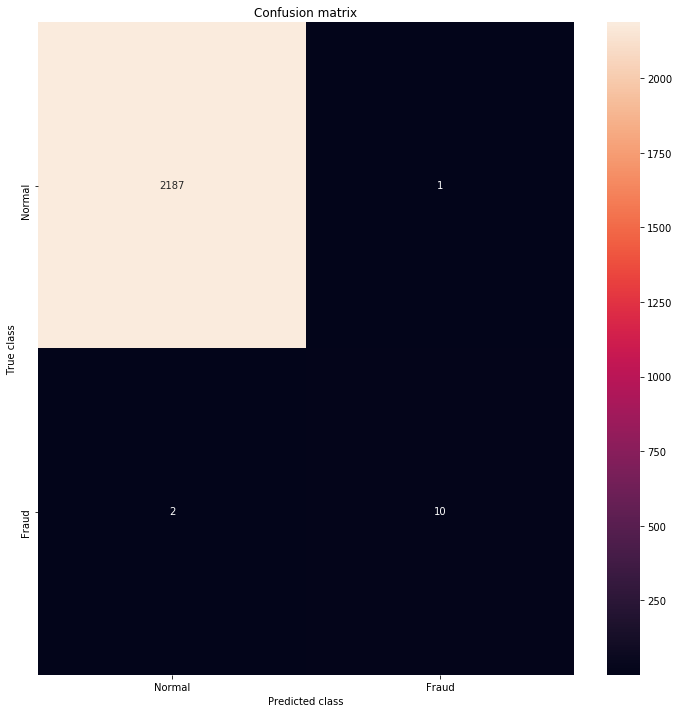

In [17]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, predTree) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [19]:
import pickle
from sklearn.externals import joblib
joblib.dump(FDTree,'./FDTree_CFD.joblib', compress=True)
joblib.dump(wi_fn,'./wi_fn_CFD.joblib', compress=True)
joblib.dump(wi_ln,'./wi_ln_CFD.joblib', compress=True)
joblib.dump(df_country_dict,'./df_country_dict.joblib', compress=True)

['./df_country_dict.joblib']

In [ ]:
data={
    
}